<a href="https://colab.research.google.com/github/statenandrea33/Staten_GEOG312_Lab10/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geographic Data Handling

This lab will expose you to different geographical datasets and guide you on how to handle them within python. This lab will also introduce mapping techniques within python for vector and raster datasets.

## Part 1: Shapefiles
Shapefiles are containers for storing geometric information and their attributed data. Shapefiles can contain points, lines, and polygons and information related to those shapes.


Let's explore a shapefile using the code below.

In [ ]:
%pip install geopandas
%pip install shapely # or conda install shapely

In [ ]:
import geopandas as gpd

# Replace 'your_shapefile.shp' with the path to your shapefile
# A great resource for finding shapefiles is: https://libguides.utk.edu/tngis
shapefile_path = '/Users/n44/Downloads/points.shp'

# Read the shapefile
hgdf = gpd.read_file(shapefile_path)

# Display the first few rows of the attribute data
print("Attribute Data:")
print(hgdf.head())

# Get basic information about the shapefile
print("\nShapefile Information:")
print(f"Number of features: {len(hgdf)}")
print(f"Crs (Coordinate Reference System): {hgdf.crs}")
print(f"Geometry type: {hgdf.geometry.type.unique()}")

# Plot the shapefile
hgdf.plot()


## Managing Shapefiles

One of the things that is common to do is to convert a csv with latitude and longitude coordinates to a shapefile. Let's try doing that with a csv.
The data shows electric vehicle charging stations across the state of Tennessee

In [ ]:
import pandas as pd
from shapely.geometry import Point

#Remember to get the path of the folder and paste it in to load it. For windows users, your slashes will need to be altered.
electricVehicle_df = pd.read_csv('/Users/n44/Downloads/alt_fuel_stations (Oct 23 2023).csv')

#
geometry = [Point(xy) for xy in zip(electricVehicle_df['Longitude'], electricVehicle_df['Latitude'])]
gdf = gpd.GeoDataFrame(electricVehicle_df, geometry=geometry)

# Step 3: Set the Coordinate Reference System (CRS)
# Specify the appropriate CRS. For example, EPSG:4326 for WGS 84. You can find a list of
#CRS
gdf.crs = 'EPSG:4326'


# Step 4: Write to a Shapefile
output_shapefile = 'points.shp'
gdf.to_file(output_shapefile)

print(f"Shapefile created: {output_shapefile}")

## Mapping with Shapefiles
Excellent! You explored the shapefile and learned more about its attributes. Now let's try mapping the shapefile.

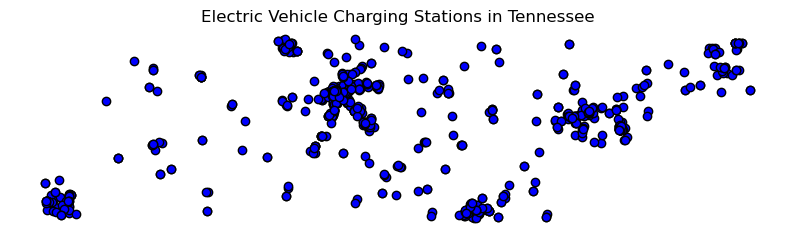

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = 'points.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the shapefile on the axis
gdf.plot(ax=ax, color='blue', edgecolor='k')

# Customize the map appearance (optional)
ax.set_title('Electric Vehicle Charging Stations in Tennessee')
ax.set_axis_off()

# Display the map
plt.show()


**Question**

Based on the above, can you tell where the most electric vehicle charging stations are located by city?


Can you tell where the most electric vehicle charging stations are located by region (west, middle, and east TN)?


## Part 2: Raster Files (NetCDF, GRIB, HDF, TIFF)
Raster files come in different formats such as NetCDF, GRIB, HDF, and TIFF. However, at the end of the day they are much better for providing information over large areas in a much more use friendly way. Let's explore a couple of raster datatypes and learn how to plot them on a map.

Make sure you have the following packages installed: netCDF4 and Rasterio

In [ ]:
pip install netCDF4
pip install rasterio
conda install -c basemap
conda install -c conda-forge basemap-data-hires # This is required for high resolution maps, but it will take more space on your local disk.

**NetCDF Files**

In [ ]:
import netCDF4 as nc
import rasterio

# Replace 'your_file.nc' with the path to your NetCDF file
nc_file_path = '/Users/n44/Downloads/yycompos.192.249.3.186.296.8.1.46.nc'

# Open the NetCDF file
nc_file = nc.Dataset(nc_file_path, 'r')

# Display basic information about the NetCDF file
print("NetCDF File Information:")
print(f"File Format: {nc_file.file_format}")
print(f"Dimensions: {nc_file.dimensions}")
print(f"Variables: {nc_file.variables}")

# Close the NetCDF file when you're done
nc_file.close()



NetCDF File Information:
File Format: NETCDF3_CLASSIC
Dimensions: {'y': <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 277, 'x': <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 349, 'level': <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 29, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1}
Variables: {'level': <class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    units: millibar
    actual_range: [1000.  100.]
    long_name: Level
    positive: down
    GRIB_id: 100
    GRIB_name: hPa
    axis: Z
    coordinate_defines: point
unlimited dimensions: 
current shape = (29,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(y, x)
    long_name: latitude
    units: degrees_north
    standard_name: latitude
    axis: Y
    coordinate_defines: point
unlimited dimensions: 
current shape = (277, 349)
filling on, default _FillValue of 9.969209968386869e+36 u

**Other Raster Files**

In [ ]:
import rasterio

# Replace 'your_raster_file.tif' with the path to your raster file
raster_file_path = '/Users/n44/Downloads/nsrdb3_dni.tif'

# Open the raster file
with rasterio.open(raster_file_path) as src:
    # Display basic information about the raster file
    print("Raster File Information:")
    print(f"Width: {src.width}")
    print(f"Height: {src.height}")
    print(f"Number of Bands: {src.count}")
    print(f"CRS (Coordinate Reference System): {src.crs}")
    print(f"Transform (Affine): {src.transform}")

# Note: You can access and manipulate the raster data within the 'with' block

# The file is automatically closed when exiting the 'with' block


Raster File Information:
Width: 3940
Height: 2025
Number of Bands: 1
CRS (Coordinate Reference System): EPSG:4326
Transform (Affine): | 0.04, 0.00,-180.00|
| 0.00,-0.04, 59.99|
| 0.00, 0.00, 1.00|


**Plot the Raster Tiff File**

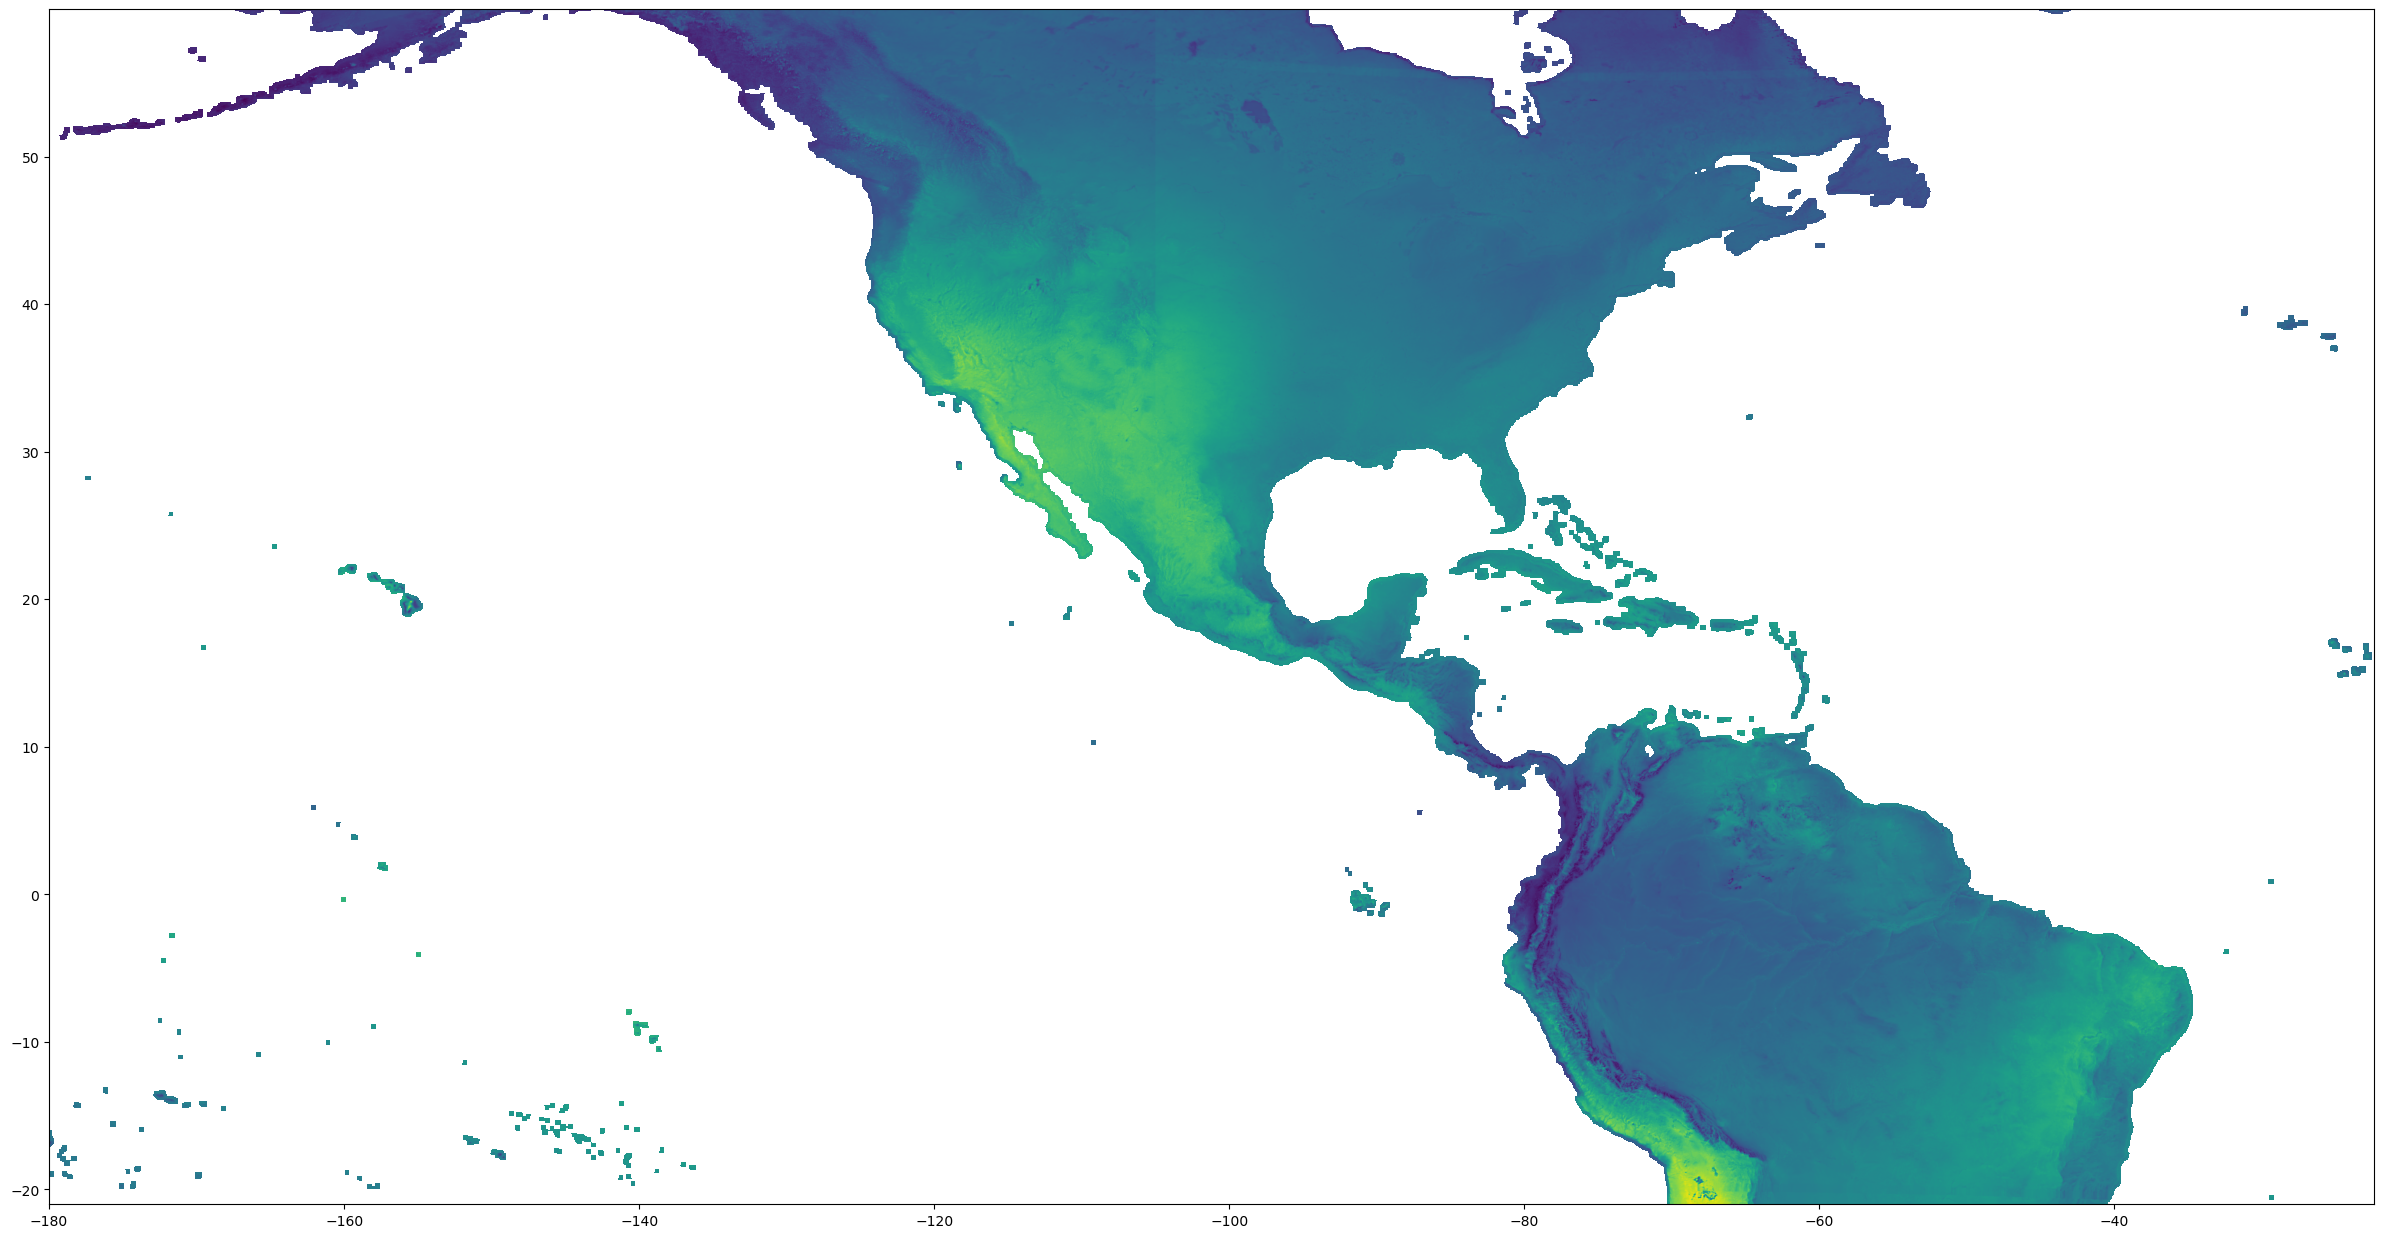

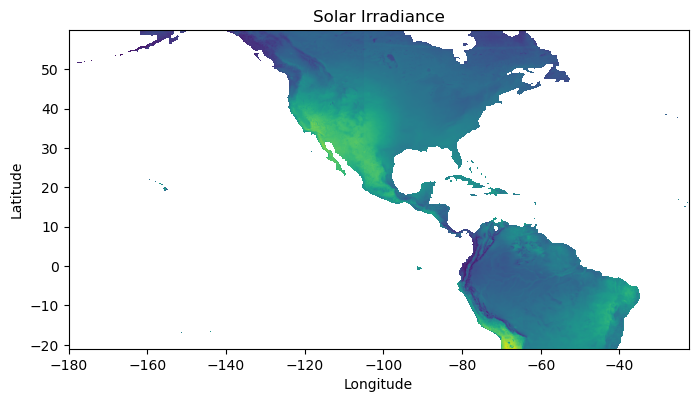

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the GeoTIFF file
src = rasterio.open(raster_file_path)

# Read and display the raster data
show(src)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Display the raster data using Matplotlib
show(src, ax=ax, cmap='viridis')

# Customize the plot (optional)
ax.set_title('Solar Irradiance')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

# Close the GeoTIFF file
src.close()


## Mapping with Raster Files

Mapping with raster files is also straightforward. However, there are adjustments that can be made such as the lat/lon extent of your map, labels, colors, and so forth.

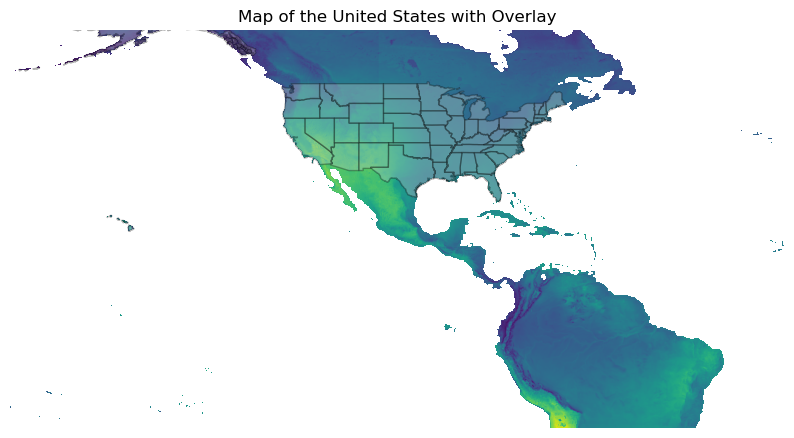

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Define the path to the shapefile of the United States (or any shapefile)
shapefile_path = '/Users/n44/Downloads/States_shapefile-shp/States_shapefile.shp'

# Define the path to the raster image you want to overlay
raster_file_path = '/Users/n44/Downloads/nsrdb3_dni.tif'

# Read the shapefile (United States boundaries)
gdf = gpd.read_file(shapefile_path)

# Open the raster image
with rasterio.open(raster_file_path) as src:
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the shapefile (United States boundaries)
    gdf.plot(ax=ax, color='lightgray', edgecolor='k', alpha = 0.3)

    # Overlay the raster image on top of the shapefile
    show(src, ax=ax)

    # Customize the map appearance (optional)
    ax.set_title('Map of the United States with Overlay')
    ax.set_axis_off()

    # Display the map
    plt.show()


## Python Mapping

Mapping in python is only different from mapping in other software (like ArcMap) because you are coding each part of the map into existence. You command every element of the map from labels, boundaries displayed, colors used, and more.

There are no shortage of packages that allow you to make maps in python.

Some of these packages are: Geopandas, Matplotlib, Cartopy, Geoplot, and of course, the ArcGIS API.

For now, we will focus on Geopandas and Matplotlib.

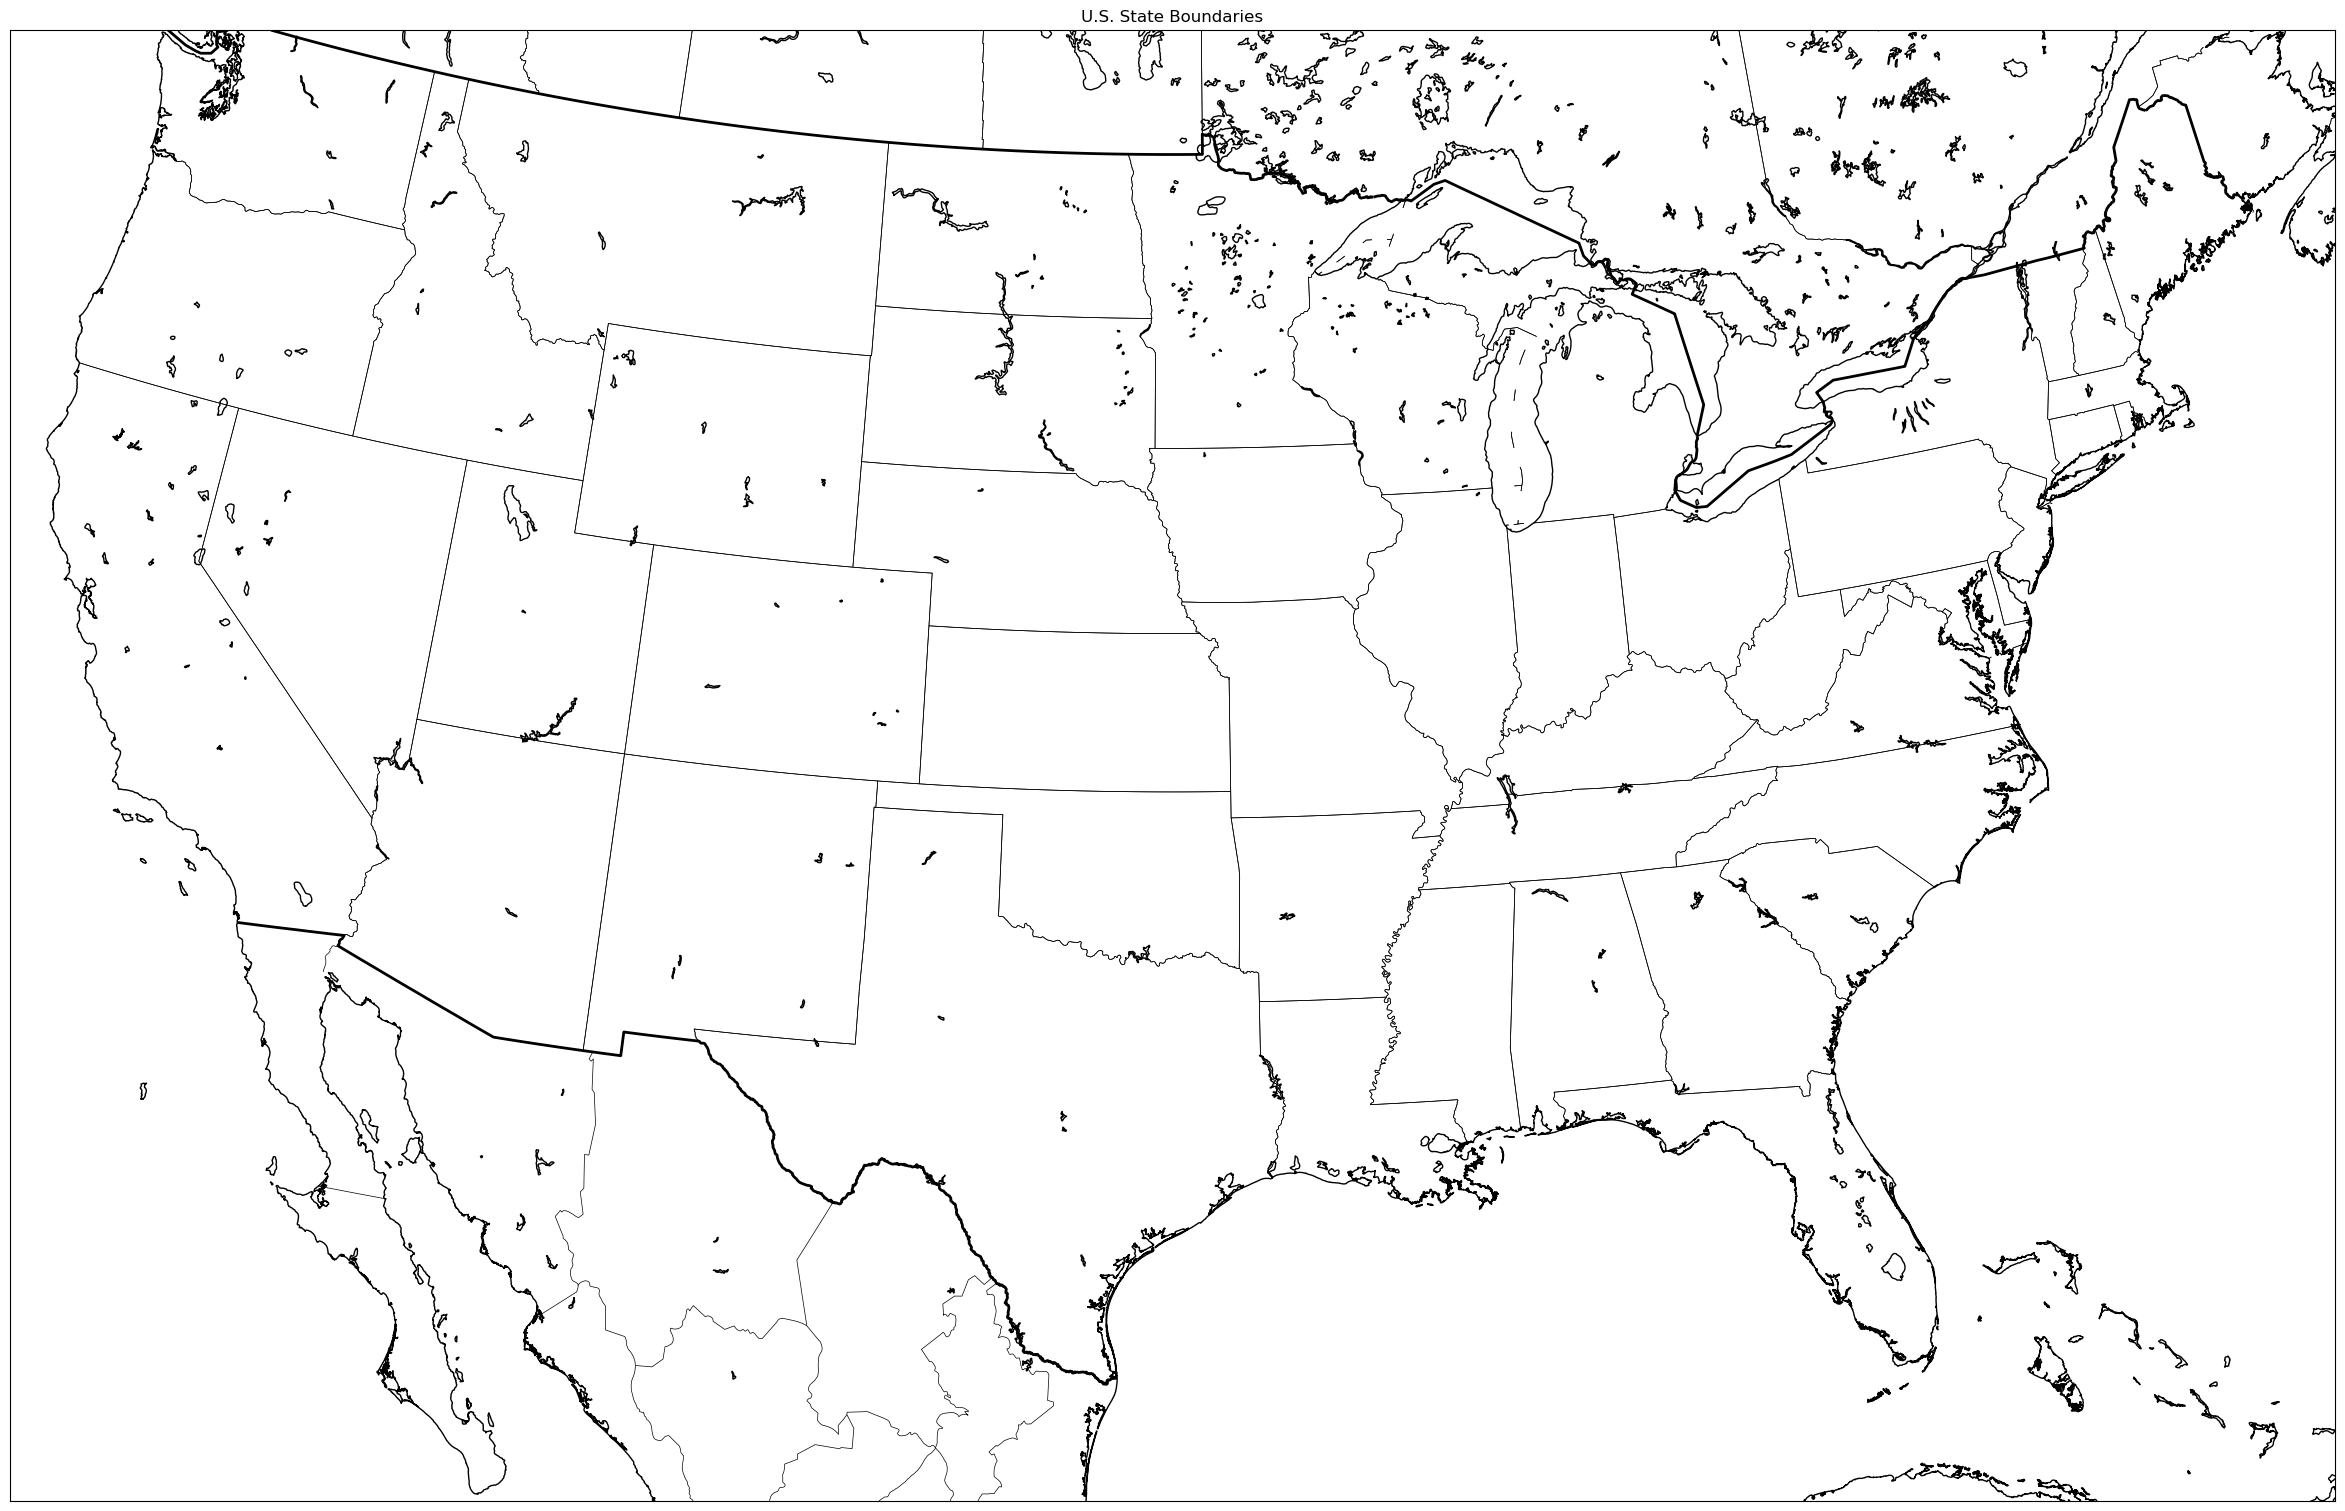

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance for the United States
m = Basemap(
    projection='lcc',
    resolution='h',
    width=4.9E6, #width and height are in meters and therefore need to be large to show the entire US.
    height=3.1E6,
    lat_0=37.5, lon_0=-96.0
)

# Draw coastlines and state boundaries
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()

# Display the map
plt.title('U.S. State Boundaries')
plt.show()


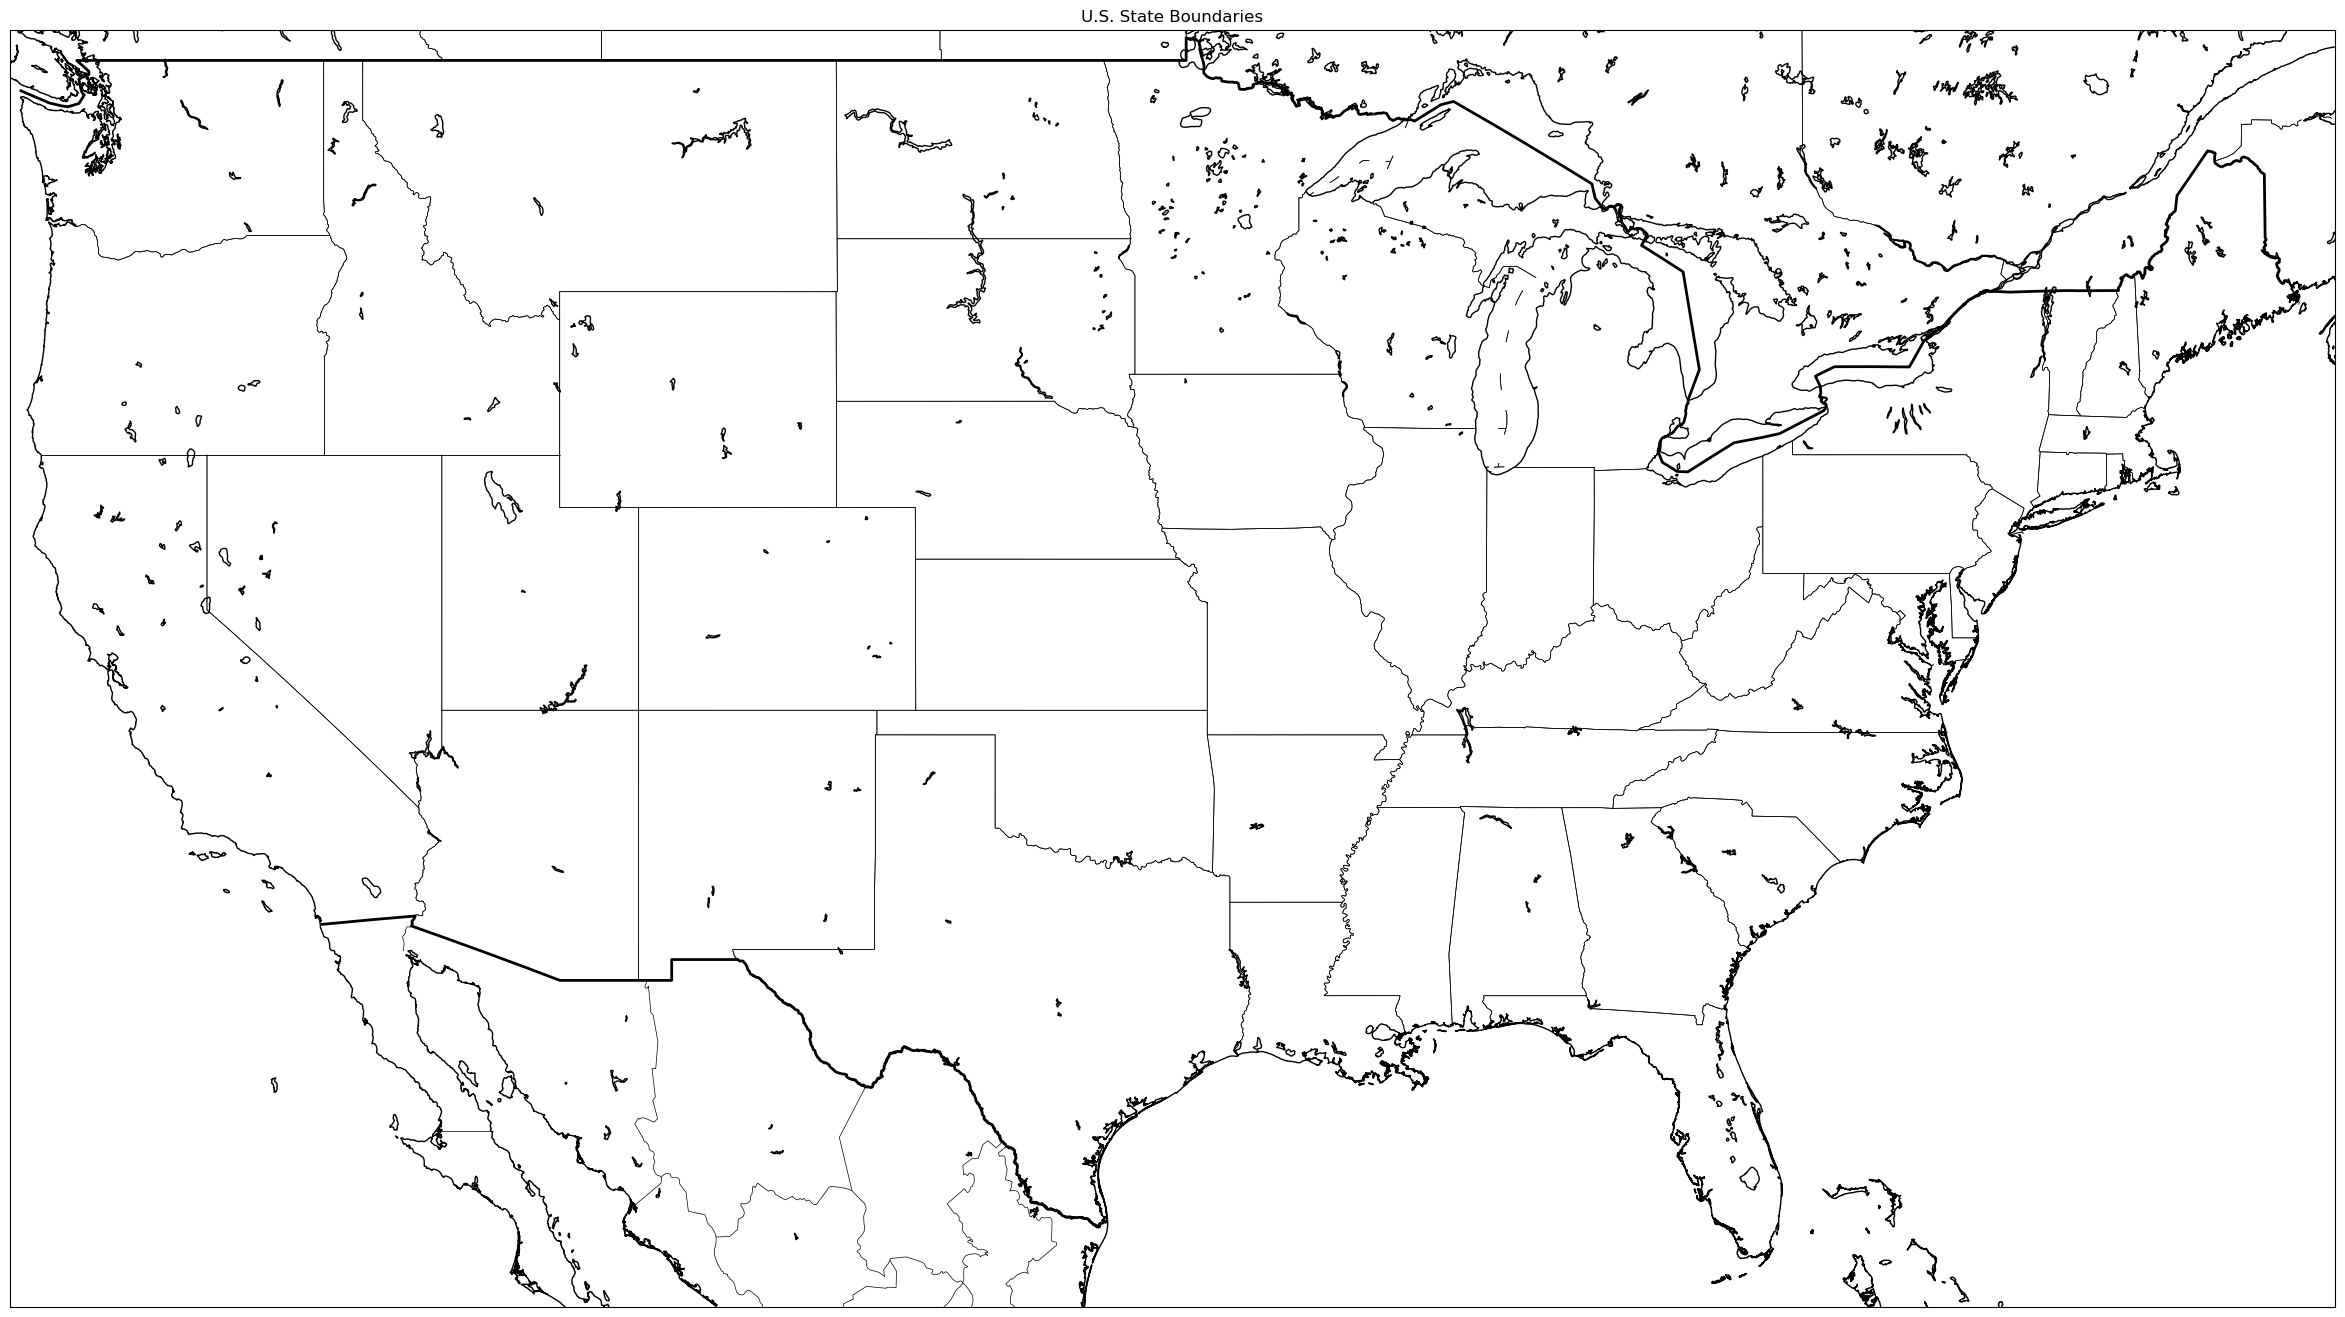

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance for the entire United States
m = Basemap(
    projection='merc',
    resolution='h',
    llcrnrlat=24, urcrnrlat=49.5, llcrnrlon=-125, urcrnrlon=-66
)

# Draw coastlines and state boundaries
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()

# Display the map
plt.title('U.S. State Boundaries')
plt.show()


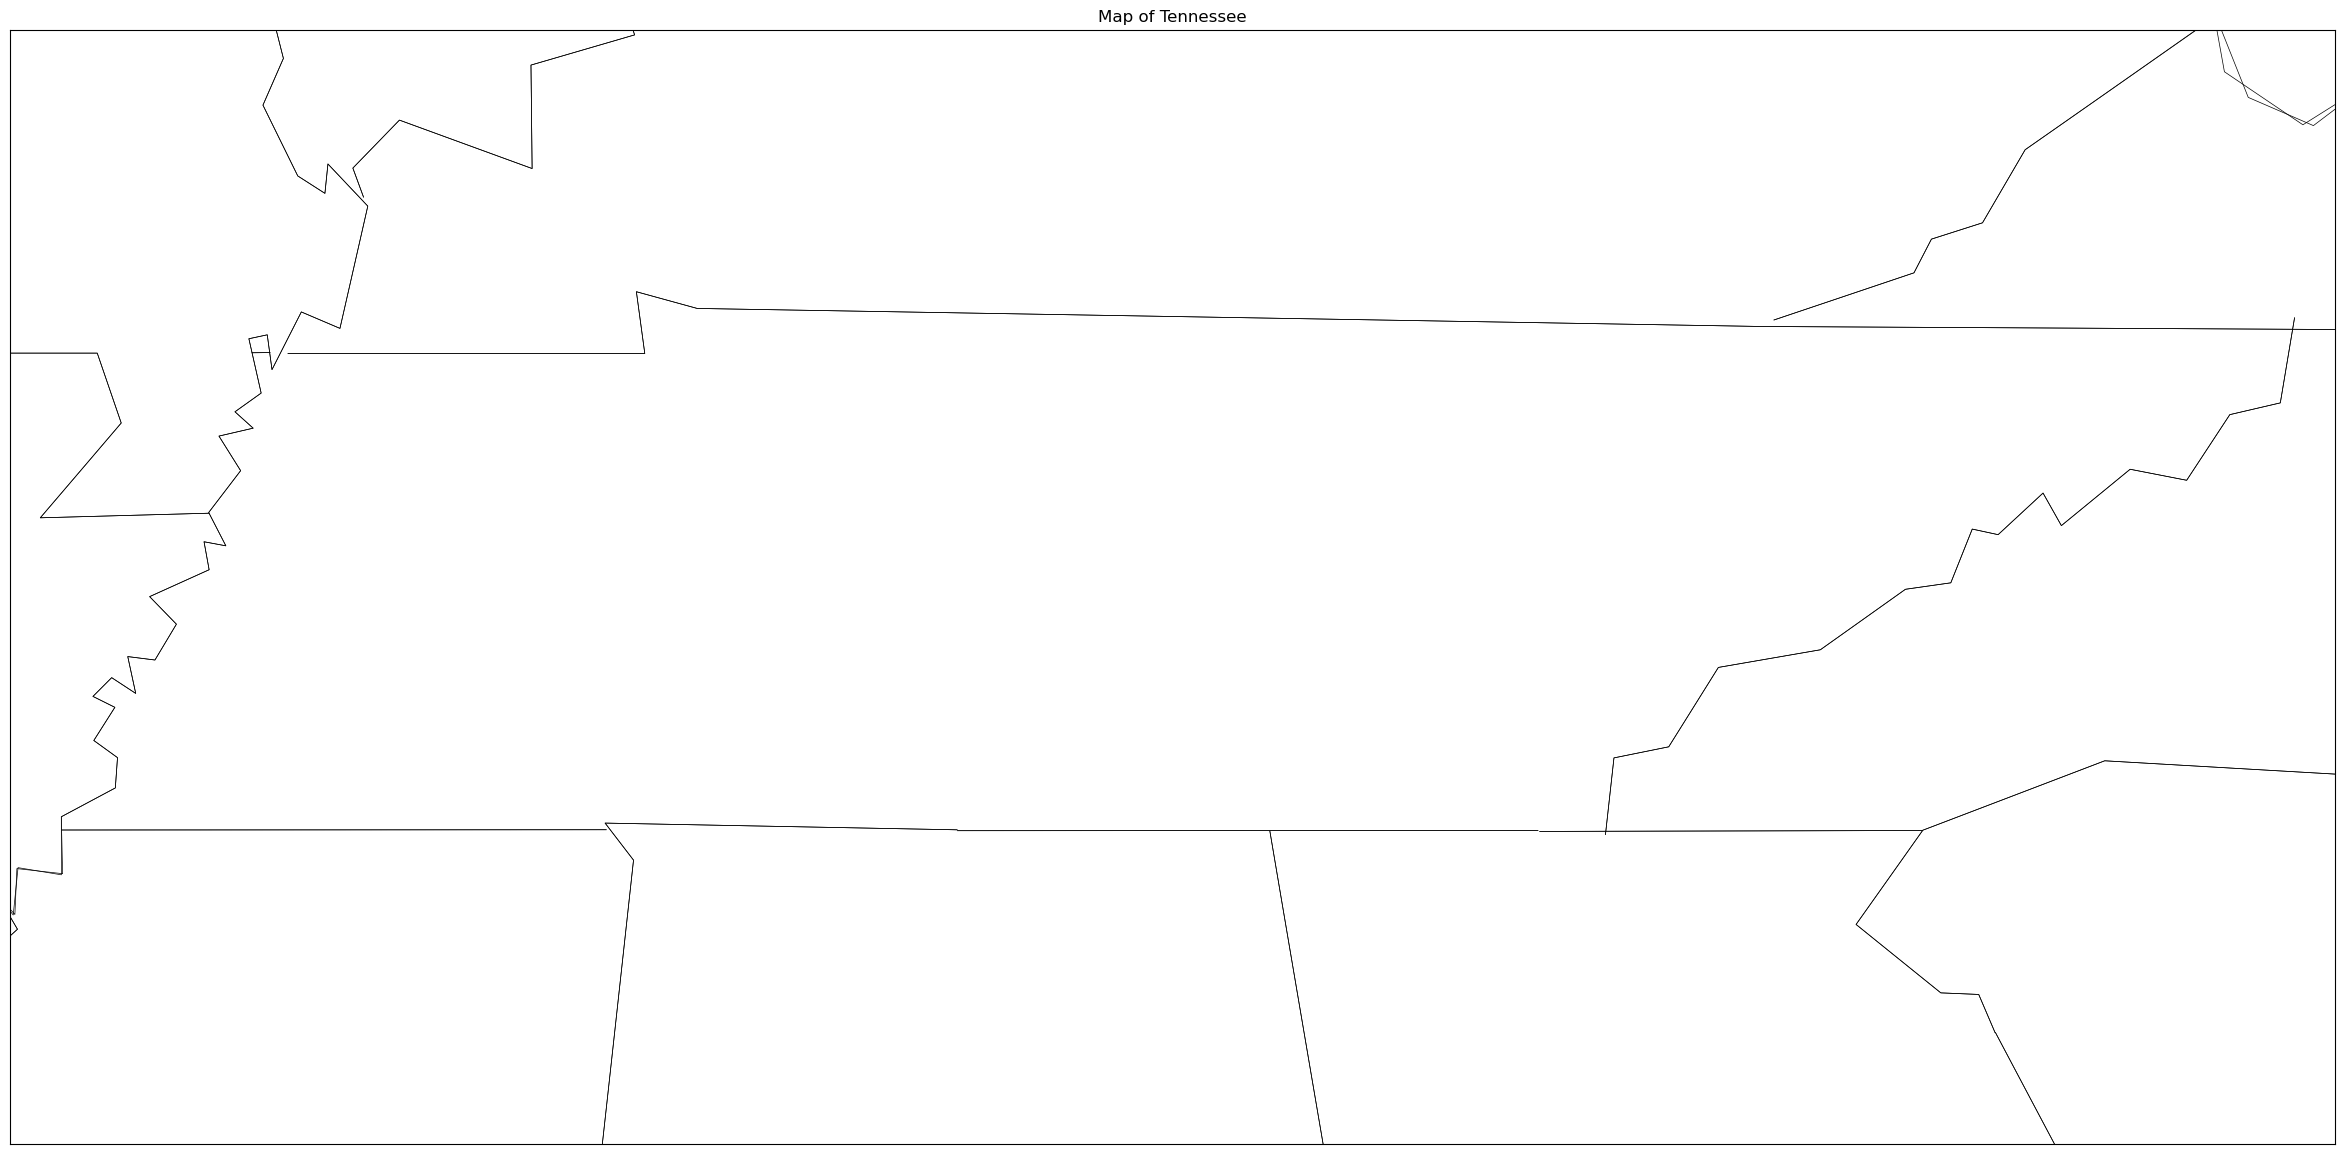

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance for the state of Tennessee
m = Basemap(
    projection='merc',
    resolution='l',
    llcrnrlat=34, urcrnrlat=37.5, llcrnrlon=-90.5, urcrnrlon=-81.5
)

# Draw coastlines and state boundaries
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()

# Display the map
plt.title('Map of Tennessee')
plt.show()


## Exercises

Let's play around with some data and try mapping that data on a map in python.

If I do not ask for you to do it in the question, you do not have to do it, but remember this is a great time to experiment.

**Question 1**

Can you plot the electric vehicle shapefile over a map of Tennessee?

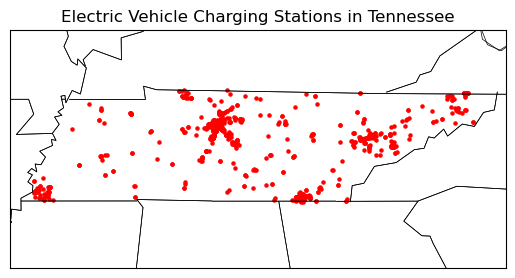

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Read the electric vehicle shapefile
ev_shapefile_path = 'points.shp'
ev_gdf = gpd.read_file(ev_shapefile_path)

# Create a Basemap instance for Tennessee
m = Basemap(
    projection='merc',
    resolution='l',
    llcrnrlat=34, urcrnrlat=37.5, llcrnrlon=-90.5, urcrnrlon=-81.5
)

# Draw coastlines, state boundaries, and plot the Tennessee boundaries
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()

# Plot the electric vehicle shapefile
x, y = m(ev_gdf['geometry'].x.values, ev_gdf['geometry'].y.values)
m.scatter(x, y, color='red', s=5)

# Display the map
plt.title('Electric Vehicle Charging Stations in Tennessee')
plt.show()


**Question 2**

Can you plot the solar irradiance raster over a map that covers the entire geographical extent shown?

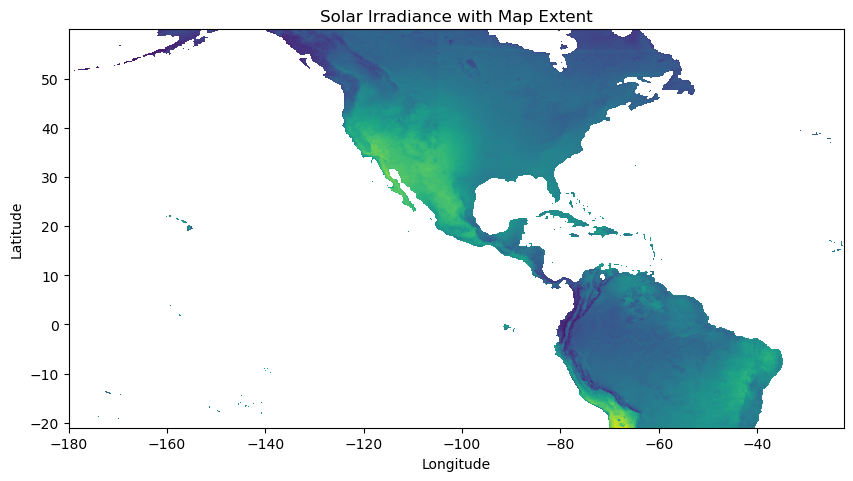

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the solar irradiance raster file
raster_file_path = 'nsrdb3_dni.tif'
with rasterio.open(raster_file_path) as src:
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the solar irradiance raster
    show(src, ax=ax, cmap='viridis')

    # Customize the plot (optional)
    ax.set_title('Solar Irradiance with Map Extent')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Display the plot
    plt.show()


**Question 3**

Can you convert the hydroplants CSV to a shapefile and plot it?

In [ ]:
%pip install cartopy

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/bb/50/ab5495dcc22587179134cd37e6534212babeda78e86bda311c37c773f086/Cartopy-0.22.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB 653.6 kB/s eta 0:00:18
    --------------------------------------- 0.1/11.2 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.2 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.2 MB 5.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.2 MB 8.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/11.2 MB 9.5 MB/s eta 0:00:01
   ---------- ----------------------------- 3.0/11.2 MB 9.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.6/11.2 MB 10.5 MB/s eta 0:00:01
   --------------- -------------

c:\Users\state\miniconda3\envs\geos\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\state\miniconda3\envs\geos\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


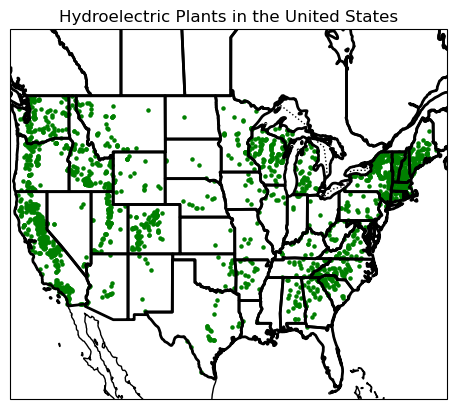

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the hydroplants CSV file with specified encoding
hydroplants_df = pd.read_csv('C:/Users/state/Downloads/Geographic Data Handling and Mapping 3/Geographic Data Handling and Mapping/ORNL_EHAHydroPlant_FY2023_rev.csv', encoding='latin-1')

# Create GeoDataFrame from the DataFrame
geometry = [Point(xy) for xy in zip(hydroplants_df['Lon'], hydroplants_df['Lat'])]
hydroplants_gdf = gpd.GeoDataFrame(hydroplants_df, geometry=geometry, crs='EPSG:4326')

# Create a Cartopy projection for the entire United States
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-125, -66, 24, 49.5])

# Plot the hydroplants shapefile
hydroplants_gdf.plot(ax=ax, color='green', markersize=5, transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=2)

plt.title('Hydroelectric Plants in the United States')
plt.show()


**Question 4**

Using your converted shapefile, can you plot the locations of all hydroelectric damns in the United States?

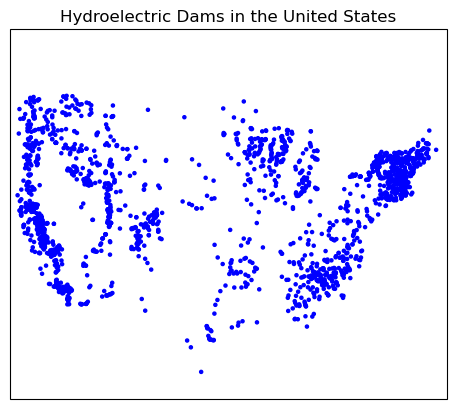

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point

# Assuming you have a GeoDataFrame of hydroelectric dams
hydrodams_shapefile = 'C:/Users/state/Downloads/Geographic Data Handling and Mapping 3/Geographic Data Handling and Mapping/hydroplants.shp'
hydrodams_gdf = gpd.read_file(hydrodams_shapefile)

# Create a Cartopy projection for the entire United States
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-125, -66, 24, 49.5])

# Plot the hydroelectric dams
hydrodams_gdf.plot(ax=ax, color='blue', markersize=5, transform=ccrs.PlateCarree(), marker='o', linestyle='')

plt.title('Hydroelectric Dams in the United States')
plt.show()


**Question 5**

Now put a map of the United States beneath those points.

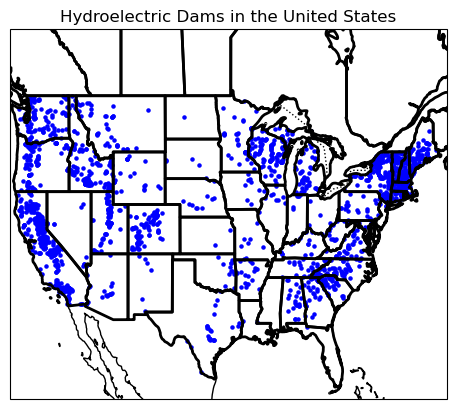

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming you have a shapefile of all hydroelectric dams in the United States
hydrodams_shapefile = 'C:/Users/state/Downloads/Geographic Data Handling and Mapping 3/Geographic Data Handling and Mapping/hydroplants.shp'
hydrodams_gdf = gpd.read_file(hydrodams_shapefile)

# Create a Cartopy projection for the entire United States
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-125, -66, 24, 49.5])

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=2)

# Plot the hydroelectric dams shapefile
hydrodams_gdf.plot(ax=ax, color='blue', markersize=5, transform=ccrs.PlateCarree())

plt.title('Hydroelectric Dams in the United States')
plt.show()


**Question 6**

Filter out the points for just Tennessee, plot it, and make sure you have a map of Tennessee beneath the points.

c:\Users\state\miniconda3\envs\geos\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


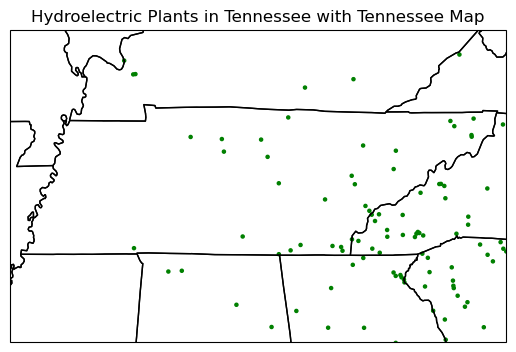

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point

# Assuming you have a GeoDataFrame of hydroelectric plants
hydroplants_shapefile = 'C:/Users/state/Downloads/Geographic Data Handling and Mapping 3/Geographic Data Handling and Mapping/hydroplants.shp'
hydroplants_gdf = gpd.read_file(hydroplants_shapefile)

# Assuming you have a shapefile of Tennessee boundaries
tn_shapefile = 'C:/Users/state/Downloads/Geographic Data Handling and Mapping 3/Geographic Data Handling and Mapping/States_shapefile-shp/States_shapefile.shp'
tn_gdf = gpd.read_file(tn_shapefile)

tn_hydroplants_gdf = gpd.sjoin(hydroplants_gdf, tn_gdf, op='within')

# Create a Cartopy projection for Tennessee
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([-90.5, -81.5, 34, 37.5])

# Add map features for Tennessee
ax.add_geometries(tn_gdf['geometry'], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')

# Plot the hydroelectric plants in Tennessee
tn_hydroplants_gdf.plot(ax=ax, color='green', markersize=5, transform=ccrs.PlateCarree(), marker='o', linestyle='')

plt.title('Hydroelectric Plants in Tennessee with Tennessee Map')
plt.show()
